# Table of Contents
 <p>

In [1]:
from __future__ import division, print_function
%matplotlib inline
import math,sys,os,numpy as np
from numpy.random import random
from matplotlib import pyplot as plt, rcParams, animation, rc
from ipywidgets import interact, interactive, fixed
from ipywidgets.widgets import *
rc('animation', html='html5')
rcParams['figure.figsize'] = 3, 3
%precision 4
np.set_printoptions(precision=4, linewidth=100)

In [2]:
def lin(a,b,x): return a*x+b

In [3]:
a=3.
b=8.

In [4]:
n=30
x = random(n)
y = lin(a,b,x)

In [5]:
x

array([ 0.404 ,  0.2024,  0.0466,  0.8144,  0.4518,  0.477 ,  0.6216,  0.787 ,  0.6333,  0.1567,
        0.4838,  0.532 ,  0.3954,  0.354 ,  0.2994,  0.1839,  0.745 ,  0.4589,  0.8388,  0.9738,
        0.0744,  0.8001,  0.0995,  0.166 ,  0.5395,  0.9709,  0.1815,  0.1335,  0.9939,  0.9999])

In [6]:
y

array([  9.212 ,   8.6072,   8.1399,  10.4433,   9.3554,   9.4309,   9.8648,  10.3609,   9.8998,
         8.4702,   9.4513,   9.5961,   9.1863,   9.0621,   8.8982,   8.5517,  10.235 ,   9.3766,
        10.5163,  10.9214,   8.2231,  10.4004,   8.2986,   8.4979,   9.6184,  10.9128,   8.5444,
         8.4006,  10.9816,  10.9998])

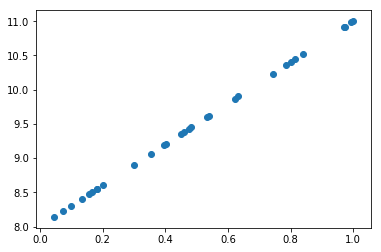

In [7]:
plt.scatter(x,y)

In [8]:
def sse(y,y_pred): return ((y-y_pred)**2).sum()
def loss(y,a,b,x): return sse(y, lin(a,b,x))
def avg_loss(y,a,b,x): return np.sqrt(loss(y,a,b,x)/n)

In [9]:
a_guess=-1.
b_guess=1.
avg_loss(y, a_guess, b_guess, x)

9.0560

In [10]:
lr=0.01
# d[(y-(a*x+b))**2,b] = 2 (b + a x - y)      = 2 (y_pred - y)
# d[(y-(a*x+b))**2,a] = 2 x (b + a x - y)    = x * dy/db

In [11]:
def upd():
    global a_guess, b_guess
    y_pred = lin(a_guess, b_guess, x)
    dydb = 2 * (y_pred - y)
    dyda = x*dydb
    a_guess -= lr*dyda.mean()
    b_guess -= lr*dydb.mean()

In [12]:
fig = plt.figure(dpi=100, figsize=(5, 4))
plt.scatter(x,y)
line, = plt.plot(x,lin(a_guess,b_guess,x))
plt.close()

def animate(i):
    line.set_ydata(lin(a_guess,b_guess,x))
    for i in range(10): upd()
    return line,

ani = animation.FuncAnimation(fig, animate, np.arange(0, 40), interval=100)
ani